# Predicting heart disease using machine learning
We are going to take following appproach
1. Problem Definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation


# Predicting heart disease using machine learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

    Problem definition
    Data
    Evaluation
    Features
    Modelling
    Experimentation

1. Problem Definition

In a statement,

    Given clinical parameters about a patient, can we predict whether or not they have heart disease?

2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/ronitf/heart-disease-uci
3. Evaluation

    If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

Create data dictionary

   * age - age in years
   * sex - (1 = male; 0 = female)
   * cp - chest pain type
        0: Typical angina: chest pain related decrease blood supply to the heart
        1: Atypical angina: chest pain not related to heart
        2: Non-anginal pain: typically esophageal spasms (non heart related)
        3: Asymptomatic: chest pain not showing signs of disease
   * trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
   * chol - serum cholestoral in mg/dl
        serum = LDL + HDL + .2 * triglycerides
        above 200 is cause for concern
   * fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
        '>126' mg/dL signals diabetes
   * restecg - resting electrocardiographic results
        0: Nothing to note
        1: ST-T Wave abnormality
            can range from mild symptoms to severe problems
            signals non-normal heart beat
        2: Possible or definite left ventricular hypertrophy
            Enlarged heart's main pumping chamber
   * thalach - maximum heart rate achieved
   * exang - exercise induced angina (1 = yes; 0 = no)
   * oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
   * slope - the slope of the peak exercise ST segment
        0: Upsloping: better heart rate with excercise (uncommon)
        1: Flatsloping: minimal change (typical healthy heart)
        2: Downslopins: signs of unhealthy heart
   * ca - number of major vessels (0-3) colored by flourosopy
        colored vessel means the doctor can see the blood passing through
        the more blood movement the better (no clots)
   * thal - thalium stress result
        1,3: normal
        6: fixed defect: used to be defect but ok now
        7: reversable defect: no proper blood movement when excercising
    * target - have disease or not (1=yes, 0=no) (= the predicted attribute)

Preparing the tools

We're going to use pandas, Matplotlib and NumPy for data analysis a

In [1]:
# Import all the tools we used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Import model from scikit-learn

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
df = pd.read_csv("heart-disease.csv")

In [3]:
df.shape

(303, 14)

# Data Exploration (exploratory data analysis or EDA)
1. Questions 
2. What kind of data we have and how do we treat different types
3. What missing and how to deal with it
4. Where are the outliers and why should you care about them
5. How can we add,change or remove features to get more out of data

In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

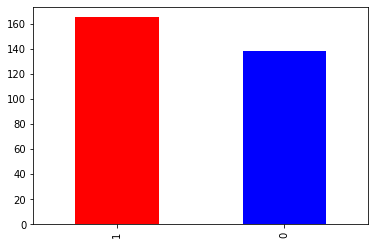

In [6]:
# Balanced Data
df["target"].value_counts().plot(kind="bar", color=["red","blue"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
### Heart Disease Frequency according to Sex
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [11]:
pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


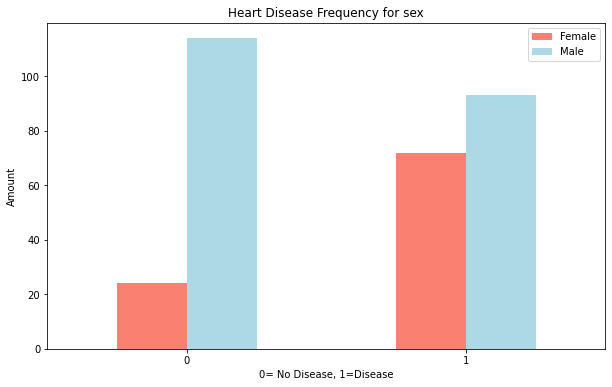

In [12]:
# create a plot of crosstab
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",
                                        figsize=(10,6),
                        color=["salmon","lightblue"])
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0= No Disease, 1=Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

In [13]:
df["thalach"].value_counts()

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

### Age vs Max Heart Rate

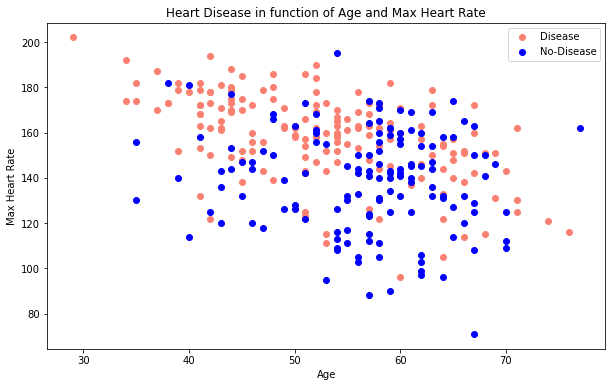

In [14]:
plt.figure(figsize=(10,6))

#scatter with positive examples
plt.scatter(df["age"][df["target"]==1],
           df["thalach"][df["target"]==1],
           c="salmon")
#scatter with negative examples
plt.scatter(df["age"][df["target"]==0],
            df["thalach"][df["target"]==0],
            c="blue"
           ) 


# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease","No-Disease"] );

<AxesSubplot:ylabel='Frequency'>

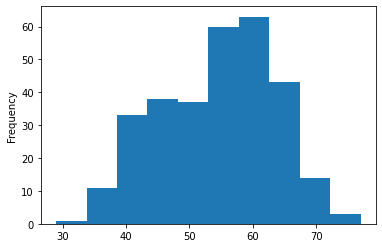

In [15]:
#check the distribution of age column with a histgram
df["age"].plot(kind="hist")

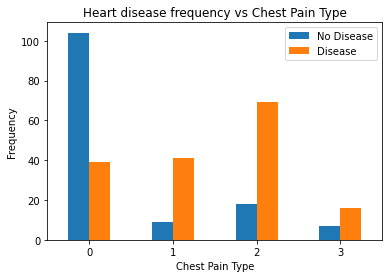

In [16]:
#chest pain to target
pd.crosstab(df["cp"],df["target"]).plot(kind="bar")
plt.title("Heart disease frequency vs Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease","Disease"])
plt.xticks(rotation=0);

In [17]:
# Correlation Matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


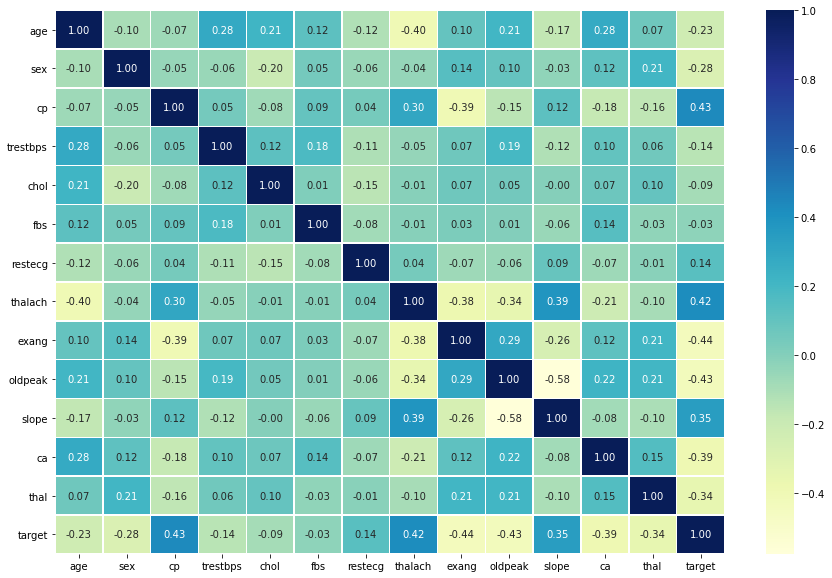

In [18]:
# Lets Make our correlation matrix a littler prettier
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu" 
              )

In [19]:
 pd.crosstab(df["exang"],df["target"])

target,0,1
exang,,
0,62,142
1,76,23


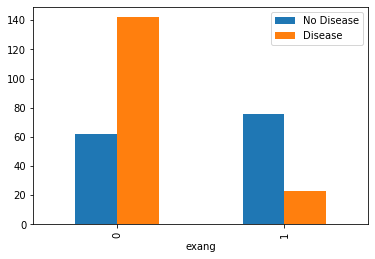

In [20]:
pd.crosstab(df["exang"],df["target"]).plot(kind="bar")
plt.legend(["No Disease","Disease"])

# 5.Modelling


In [21]:
X=df.drop("target",axis=1)
y=df["target"]

In [22]:
# Split Data
np.random.seed(1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

# We try 3 Models
1. Logistics Regression
2. KNeighbour
3. Random Forest Classifier

In [24]:
# Put Model in a dictionary
models={"Logistic Regression": LogisticRegression(),
        "KNN": KNeighborsClassifier(),
        "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train,X_test,y_train,y_test):
    """Fits and Evaluate given machine learning models.
       """
    np.random.seed(42)
    #Make a dictionary to keep model score
    model_scores={}
    #Loop through models
    for name,model in models.items():
        #fit a model
        model.fit(X_train,y_train)
        #Evaluate a model
        model_scores[name]=model.score(X_test,y_test)
    return model_scores    
        

In [25]:
model_scores=fit_and_score(models,X_train,X_test,y_train,y_test)

C:\Users\AR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
model_scores

{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.7540983606557377}

(array([0, 1, 2]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'KNN'),
  Text(2, 0, 'Random Forest')])

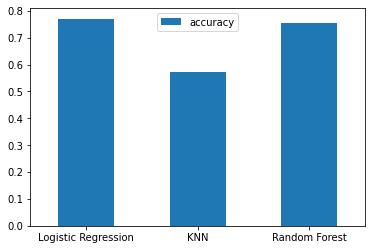

In [27]:
# Model Comparison
model_compare = pd.DataFrame(model_scores,index=["accuracy"])
model_compare.T.plot(kind="bar")
plt.xticks(rotation=0)

Now we've got a baseline model and its prediction our not best the first time around and we can make right prediction.

* Hyperpermeter tuning
* Feature importance
* COnfusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification Report 
* Roc Curve
* Area under the curve

<AxesSubplot:>

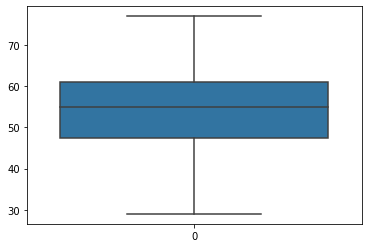

In [28]:
sns.boxplot(data=df["age"],)

### Hyperparameter tuning

In [29]:
# lets tune knn
train_scores=[]
test_scores=[]

#create a list of different values for n_neighbour

neighbors= range(1,21)

#setup Knn instance
knn =KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    # Fit the algorithm
    knn.fit(X_train,y_train)
    
    # Update the training score list
    train_scores.append(knn.score(X_train,y_train))
    
    # Update the test score list
    test_scores.append(knn.score(X_test,y_test))

In [30]:
train_scores,test_scores

([1.0,
  0.8264462809917356,
  0.7933884297520661,
  0.7975206611570248,
  0.7768595041322314,
  0.78099173553719,
  0.756198347107438,
  0.743801652892562,
  0.7231404958677686,
  0.731404958677686,
  0.731404958677686,
  0.7231404958677686,
  0.7148760330578512,
  0.7066115702479339,
  0.7107438016528925,
  0.71900826446281,
  0.6942148760330579,
  0.6983471074380165,
  0.7107438016528925,
  0.7107438016528925],
 [0.4918032786885246,
  0.4918032786885246,
  0.5737704918032787,
  0.5409836065573771,
  0.5737704918032787,
  0.5737704918032787,
  0.5737704918032787,
  0.5901639344262295,
  0.5901639344262295,
  0.5737704918032787,
  0.5737704918032787,
  0.5737704918032787,
  0.5737704918032787,
  0.5737704918032787,
  0.6229508196721312,
  0.6229508196721312,
  0.6065573770491803,
  0.639344262295082,
  0.6065573770491803,
  0.6229508196721312])

MAximum Knn score on test data: 63.93


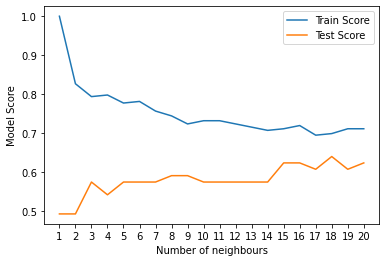

In [31]:
plt.plot(neighbors,train_scores,label="Train Score")
plt.plot(neighbors,test_scores,label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model Score")
plt.legend()
print(f"MAximum Knn score on test data: {max(test_scores)*100:.2f}")

### Hyperparameter tuning with RandomizedSearchCV


we're going to tune:
* Logistic Regression
* Random Forest Classifier   
................using randomsearchCV

In [32]:
# Create a hyperparameter grid for logisticsRegression
log_reg_grid = {"C": np.logspace(-4,4,20),
                "solver": ["liblinear"]}

# Create a hyperparameter grid for RandomForestClassifier

rf_grid={"n_estimators": np.arange(10,1000,50),
         "max_depth" : [None, 3, 5,10],
         "min_samples_split": np.arange(2,20,2),
         "min_samples_leaf": np.arange(1,20,2)
}

In [33]:
#tune using randomizedsearchcv

#1.LogisticsRegression
np.random.seed(42)
# setup random hyperparameter search for logisticsRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)
# Fit random hyperparameter search model for logisticRegression
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [34]:
LogisticRegression.get_params

<function sklearn.base.BaseEstimator.get_params(self, deep=True)>

In [35]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [36]:
rs_log_reg.score(X_test,y_test)

0.7704918032786885

In [38]:
#Now we tune our random forest classifier
np.random.seed(42)

#setup random hyperparameter search for random forrest
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                       param_distributions=rf_grid,
                       n_iter=20,
                       cv=5,
                       verbose=True
)
# Fit Model
rs_rf.fit(X_train,y_train)
# Score Model
rs_rf.score(X_test,y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.0min finished


0.7868852459016393

In [39]:
rs_rf.best_params_

{'n_estimators': 710,
 'min_samples_split': 16,
 'min_samples_leaf': 3,
 'max_depth': 10}

In [41]:
model_scores

{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.7540983606557377}

## Hyperparameter Tuning with GridSearchCV

since our logisticsRegression is best so far so we try and improve it by using GridSearchCV

In [42]:
# Different parameter for our Logistics for logisticsregression model

log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]
}

#Setup GridHyperparameter
log_grid=GridSearchCV(LogisticRegression(),
                      param_grid=log_reg_grid,
                      cv=5,
                      verbose=True
)

log_grid.fit(X_train,y_train)
#log_grid.score(X_test,y_test)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [43]:
model_scores

{'Logistic Regression': 0.7704918032786885,
 'KNN': 0.5737704918032787,
 'Random Forest': 0.7540983606557377}

In [44]:
log_grid.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [45]:
# Evaluate the grid SearchCv
log_grid.score(X_test,y_test)

0.7704918032786885

##### Now we are gonna go with Logistics Regression Model

In [81]:
# Read quick note and then go to Evaluation Section

### Evaluting our tuned machine learning classifier, beyond accuracy
* Roc Curve and Auc Curve
* Confusion Matrix
* Classification Report
* Precision
* Recall
* F1-Score  
and it would be great if we use cross-validation.

TO make comparsion and evaluate we first need to make predictions.

In [48]:
# Make prediction with our models
y_preds= log_grid.predict(X_test)

In [50]:
y_preds[:5], y_test[:5]

(array([0, 1, 0, 0, 0], dtype=int64),
 204    0
 159    1
 219    0
 174    0
 184    0
 Name: target, dtype: int64)

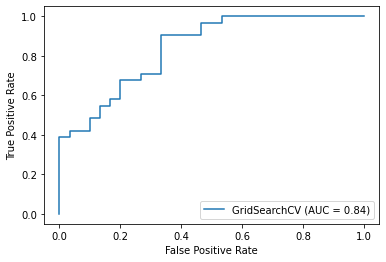

In [51]:
#Plot ROC curve and calculate AUC metric
plot_roc_curve(log_grid,X_test,y_test)

In [53]:
con_mat=confusion_matrix(y_test,y_preds)

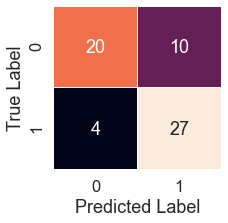

In [60]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plot a nice looking confusion matrix using seaborn heatmap
    """
    fig, ax = plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True,
                  cbar=False, 
                  linewidths=.2 
          )
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

plot_conf_mat(y_test,y_preds)    

Now We've got a Roc curve, an Auc metric and confusion matrix, let's get a classification report as well as cross- validation precision, recall and f1-score

In [62]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.83      0.67      0.74        30
           1       0.73      0.87      0.79        31

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



In [67]:
y_test.value_counts()

1    31
0    30
Name: target, dtype: int64

In [65]:
type(y_test)

pandas.core.series.Series

# Calculate evaluation matrix using cross-validation

we are going to calculate precision, recall and f1-score of our model using cross-validation and to do that we are going to use cross_val_score()

In [68]:
# check best hyperparameter
log_grid.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [69]:
clf=LogisticRegression(C=0.38566204211634725,
                      solver='liblinear'
                      )

In [81]:
#Cross Validated Acuuracy
cv_acc=cross_val_score(clf,
                X,y,
                cv=5,
                scoring="accuracy"
               )
cv_acc=np.mean(cv_acc)

cv_acc

0.8380874316939891

In [82]:
#Cross- validated Precision 
cv_prei=cross_val_score(clf,X,y,
                       cv=5,
                        scoring="precision"
                       )
cv_prei=np.mean(cv_prei)
cv_prei

0.8154667272314331

In [83]:
#Cross- validated Recall
cv_rec=cross_val_score(clf,X,y,
                       cv=5,scoring="recall"
)
cv_rec=np.mean(cv_rec)
cv_rec

0.9151515151515153

In [84]:
#Cross- validated f1score
cv_f1score=cross_val_score(clf,X,y,
                          cv=5,
                          scoring="f1")
cv_f1score=np.mean(cv_f1score)
cv_f1score

0.8614850462777628

<AxesSubplot:title={'center':'Cross-Validated Classification metrics'}>

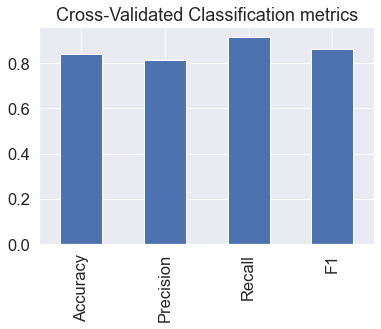

In [86]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_prei,
    "Recall": cv_rec,
    "F1": cv_f1score
}, index=[0])
cv_metrics.T.plot(kind="bar", title="Cross-Validated Classification metrics",
                  legend=False)

### Feature Importance

Feature importance is another as asking," which features contribued most to the outcomes of the models and how did they contribute?"

Finding feature importance is different for each machine learning model.

Lets find the feature importance for our logisticRegression model.

In [88]:
# Fit and instance of logisticsRegression
clf=LogisticRegression(C=0.38566204211634725,
                      solver='liblinear'
                      )
clf.fit(X_train,y_train)

LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [89]:
#Check coef_
clf.coef_

array([[-0.00159735, -1.39593453,  0.92734589, -0.02018937, -0.00269665,
         0.06814244,  0.5155538 ,  0.03413803, -0.72024755, -0.5952922 ,
         0.19052501, -0.59478692, -0.36218158]])

In [91]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [97]:
# Match Coef's of features to columns
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))

In [98]:
feature_dict

{'age': -0.0015973529197282612,
 'sex': -1.3959345292022007,
 'cp': 0.9273458929368423,
 'trestbps': -0.020189367622519085,
 'chol': -0.0026966468637392217,
 'fbs': 0.06814244127346177,
 'restecg': 0.5155537963137398,
 'thalach': 0.03413803135738532,
 'exang': -0.7202475501723903,
 'oldpeak': -0.5952922035772316,
 'slope': 0.19052501005516304,
 'ca': -0.5947869220136607,
 'thal': -0.3621815769850567}

<AxesSubplot:title={'center':'Feature Importance'}>

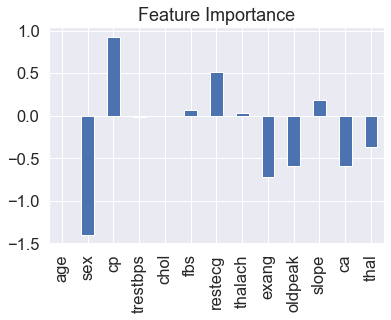

In [99]:
# Visualize features importance
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",title="Feature Importance", legend=False)

<AxesSubplot:xlabel='sex'>

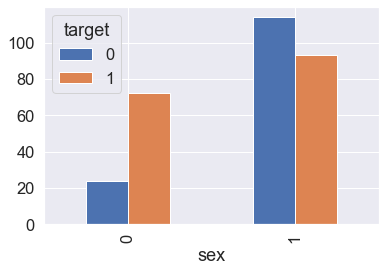

In [101]:
pd.crosstab(df["sex"],df["target"]).plot(kind="bar")

In [104]:
pd.crosstab(df["slope"],df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


# 6. Experiment

If you haven't hit your evaluation metric yet... ask yourself...

* could we collect more data?
* could we try a better model? Like CatBoost or XGboost?
* could you improve the current models?
* if our model is good enough, we could export it and share it with others.